### This notebook examines the fourlink2d robot model of the Robotics Toolbox (RTB) for Python - Update1. ###

In [1]:
""" Matplotlib imports
"""
import matplotlib
matplotlib.use('Qt4Agg')
%matplotlib notebook
import matplotlib.pyplot as plt   # needed to get current figure number using plt.gcf().number
from matplotlib import rc         # needed to set Matplotlib animation._repr_html_()

rc('animation', html='jshtml')    # Matplotlib animations will be HTML wrapped JavaScript

In [2]:
""" RBT for Python robot imports
"""
import _robot                   # use helper script to locate local RTB for Python robot module
from robot.plot import *        # needed to access robot plot module globals (i.e., rbplotAnims2D)
from robot.transform import *   # needed for transl() function
from robot.trajectory import *  # needed for ctraj() and jtraj() functions
from robot.kinematics import *  # needed for fkine() and ikine() functions
from robot.fourlink2d import *  # needed for robot fourlink2d model data

Using Robotics Toolbox module /home/garyd/PycharmProjects/robotics-toolbox-python/notebooks/fourlink2d/../../robot
Creating a planar four-link arm as fl2d


In [3]:
(Q,_,_) = jtraj(qn, qt, 51)  # create joint space trajectory from a nominal pose to a test pose

Although the following plot will be animated when initially drawn, the backend figure manager only provides the
capability to manipulate the last frame image. Note: do not close this interactive plot until after the next cell has been run to create the controlled video of the animation.

<IPython.core.display.Javascript object>


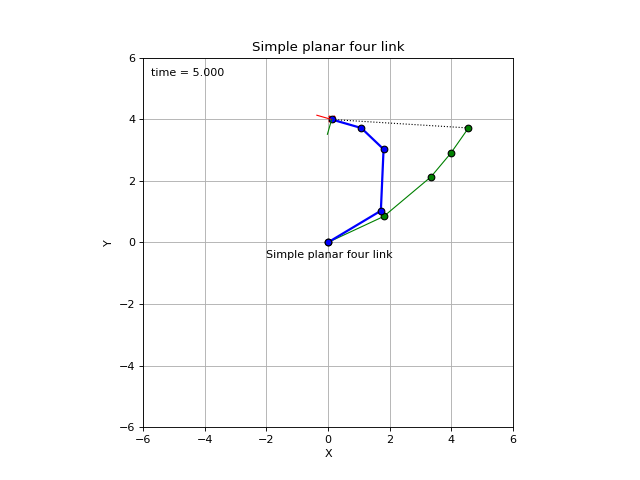

fignum = 1


In [4]:
rbplot(fl2d, Q)            # rbplot() creates a Matplotlib animation 2D object and saves a handle to it in the 
fignum = plt.gcf().number  # rbplotAnims2D dictionary using the animator's managed figure number as keyword.
print("fignum = %d" % fignum)

In order to control the animation, the animator's representation is converted to JavaScript and wrapped in HTML. Note that during the robot's joint space 'Q' movement its end-effector travels on an arc above the dashed line from its initial position to the target.

In [5]:
# Let's display the last plot as controlled animation.
rbplotAnims2D[fignum]

Now that we have demonstrated the ability to display an animated rbplot(), let's examine inverse kinematics.

In [6]:
# Create two copies of the four-link robot; move 1st upward and move 2nd downward.
fl2d_1 = fl2d.copy()
fl2d_1.name = "Four-link #1"
fl2d_1.base = transl(0.0, 1.0, 0.0)
fl2d_2 = fl2d.copy()
fl2d_2.name = "Four-link #2"
fl2d_2.base = transl(0.0, -5.0, 0.0)

The inverse kinematic function ikine() checks the condition of the Jacobian matrix for the initial joint space vector, that of the nominal pose in this case, for singularity. The condition computation may result in a division by zero runtime warning message. This warning is elevated to an error, caught and displayed with a stack trace as an informative notice. The inverse kinematic iteration processing will continue under advisement of potential slow convergence.

In [7]:
# Utilize forward and inverse kinematic functions to create a joint space trajectory 'Qik', from
# nominal pose to target pose, for the 2nd robot. 
t0 = fkine(fl2d_2, qn)
t1 = fkine(fl2d_2, qt)
Traj = ctraj(t0, t1, 51)
Qik = ikine(fl2d_2, Traj, q0=qn, m=[1,1,1,1,0,0], verbose=0)

Traceback (most recent call last):
  File "/home/garyd/PycharmProjects/robotics-toolbox-python/notebooks/fourlink2d/../../robot/kinematics.py", line 163, in ikine
    condJ0 = cond(J0)
  File "/usr/local/lib/python3.4/dist-packages/numpy/linalg/linalg.py", line 1543, in cond
    return s[..., 0]/s[..., -1]


RTB:ikine:singular: Initial joint configuration results in a (near-)singular configuration;
                    this may slow convergence.


What is important to observe in the following animation is that during robot \#1's 'Q' movement its end-effector moves on an arc above the dashed line between its initial position and target, while robot \#2's 'Qik' movement keeps its end-effector on the dashed line. This outcome is the result of inverse kinematics iteration using Jacobian pseudoinverse which computes a minimum energy trajectory between two points -- a straight line. 

<IPython.core.display.Javascript object>


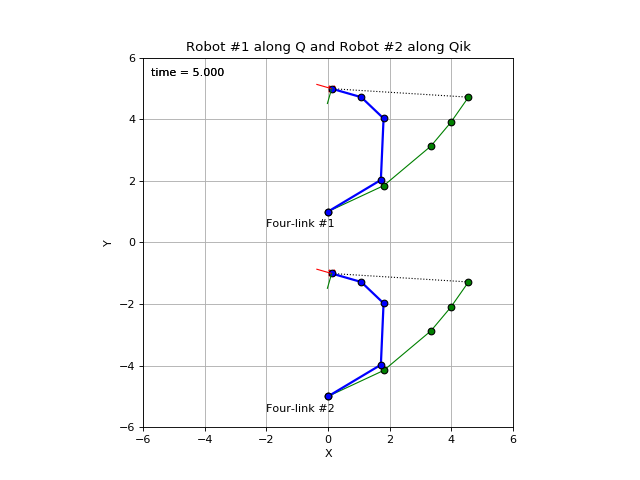

fignum = 2


In [8]:
# Simultaneously show 1st robot motion along 'Q' and 2nd robot motion along 'Qik' on the same plot.
rbplot(fl2d_1, Q, title="Robot #1 along Q and Robot #2 along Qik")
rbplot(fl2d_2, Qik, phold=True)
fignum = plt.gcf().number
print("fignum = %d" % fignum)

In [9]:
# Let's use controlled animation for figure 2.
rbplotAnims2D[fignum]